In [2]:
#Import relevant packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

## Short-term activity of of three spiders

Open file **Week2_data1.csv** in MS. Excel. It should have has four columns (see image below). The first column list time (hours:minutes:seconds) and the 2-4 columns contains number of UV light crossing for the spider *s2, s4, and s6*. We will use this number of crossings as a measure of activity for a spider

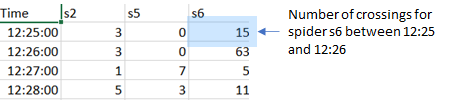

## Experiment 1: Modeling spider activity with white noise

In the first chapter of the Time series analysis book we learned that the easiest model for a time series is a white noise. That is the series of random events with the same mean and variance as the data. Let's try to model our spider data with a white noise. Such experiment provides a good visual test of hypothesis if spider behavior is random or intentional. If random, the spider activity will be similar to a random noise. However, if there are some  pattern associated with spider activity, the spider behavior should be quite different than noise

### Calculate mean and standard deviation of time series for each spider

Calculate mean and standard deviation of time series for each spider. Save as a dataframe **df_summary** which has spider id in the rows and mean(mu) and standard deviation (sigma) in columns 

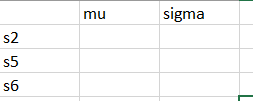

In [3]:
df = pd.read_csv("Practice 2_data1.csv")
df.drop(["Time"], axis = 1)
mu = df.mean()
sigma = df.std()
print(mu)
print(sigma)

s2    0.453731
s5    1.465672
s6    1.614925
dtype: float64
s2    3.106413
s5    5.381649
s6    7.430985
dtype: float64


C:\Users\Nai ^.^\AppData\Local\Temp\ipykernel_19268\1276420682.py:3: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  mu = df.mean()
C:\Users\Nai ^.^\AppData\Local\Temp\ipykernel_19268\1276420682.py:4: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  sigma = df.std()


In [4]:
df_summary = pd.DataFrame(data = mu, columns = ["mu"])
df_summary["sigma"] = sigma
df_summary

,mu,sigma
s2,0.453731,3.106413
s5,1.465672,5.381649
s6,1.614925,7.430985


### Write a function which produces a random number from normal distribution with given mean and standard deviation

write a funciton, **random_normal(mu, sigma)**, which input is two numbers(mean and standard deviation) and output a random number with given mean and standard deviation. If you are not familiar with random number generators in Python, check documentation to [np.ransom.normal](https://docs.scipy.org/doc/numpy-1.15.0/reference/generated/numpy.random.normal.html)

In [5]:
def random_normal(mu, sigma, size):
    x = np.random.normal(loc=mu, scale=sigma, size= size)
    return x

### Generate random time series using spiders mean and standard deviation

Now make a new data frame df_random, which is a copy of spider activity in  Week2_data1.csv. Replace every entry of spider activity with a random number with the same mean and standard deviation as spider activity. Plot spider activity and white noise on the same plot.

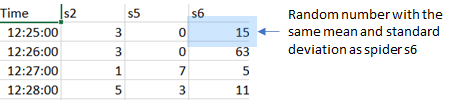

In [6]:
s2_ran = random_normal(df_summary.at["s2","mu"],df_summary.at["s2","sigma"], len(df.s2))
s5_ran = random_normal(df_summary.at["s5","mu"],df_summary.at["s5","sigma"], len(df.s5))
s6_ran = random_normal(df_summary.at["s6","mu"],df_summary.at["s6","sigma"], len(df.s6))
df_random = pd.read_csv("Practice 2_data1.csv")
df_random["s2"] = s2_ran
df_random["s5"] = s5_ran
df_random["s6"] = s6_ran

In [7]:
df_random["Time"].dropna()
df_random["Time"] = pd.to_datetime(df_random["Time"], format='%H:%M:%S')
df_random['Time'] = pd.to_datetime(df_random['Time'], errors='coerce')
bins = [12, 13, 14, 15, 16, 17, 18]
labels = ["12pm", "1pm", "2pm", "3pm", "4pm", "5pm"]
df_random['TimeBin'] = pd.cut(df_random.Time.dt.hour, bins, labels=labels, right=False)
droptime2 = df_random.drop("Time", axis = 1)
df_randomdrop = droptime2.set_index("TimeBin")
df_spider2 = df_randomdrop.groupby(df_randomdrop.index).sum()
df_spider2 = df_spider2.rename(columns={"s2":"Spider 2 Random", "s5":"Spider 5 Random", "s6":"Spider 6 Random"})

In [8]:
df_spider2[df_spider2<0]=0
df_spider2

,Spider 2 Random,Spider 5 Random,Spider 6 Random
TimeBin,,,
12pm,31.987933,47.012895,52.177232
1pm,10.229706,118.165988,217.032215
2pm,0.000000,86.973357,112.407514
3pm,0.000000,62.097732,280.216834
4pm,52.270310,50.932300,121.022149
5pm,45.216193,0.000000,148.521878


In [9]:
df2 = pd.read_csv("Practice 2_data1.csv")
df2["Time"].dropna()
df2["Time"] = pd.to_datetime(df2["Time"], format='%H:%M:%S')
df2['Time'] = pd.to_datetime(df2['Time'], errors='coerce')
bins = [12, 13, 14, 15, 16, 17, 18]
labels = ["12pm", "1pm", "2pm", "3pm", "4pm", "5pm"]
df2['TimeBin'] = pd.cut(df2.Time.dt.hour, bins, labels=labels, right=False)
droptime = df2.drop("Time", axis = 1)
df3 = droptime.set_index("TimeBin")
df_spider = df3.groupby(df3.index).sum()
df_spider = df_spider.rename(columns={"s2":"Spider 2", "s5":"Spider 5", "s6":"Spider 6"})

In [10]:
df_spider

,Spider 2,Spider 5,Spider 6
TimeBin,,,
12pm,144,58,94
1pm,8,140,117
2pm,0,122,183
3pm,0,0,147
4pm,0,0,0
5pm,0,171,0


<AxesSubplot:title={'center':'Spider 6 White Noise vs Actual'}, xlabel='TimeBin'>

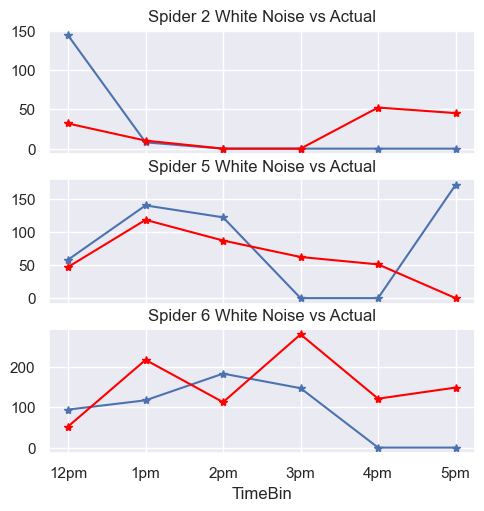

In [17]:
plot, sub = plt.subplots(3, sharex=True)
plot.set_size_inches(5.5, 5.5)
sub[0].set_title('Spider 2 White Noise vs Actual')
df_spider['Spider 2'].plot(linestyle='-', marker='*', color='b', ax=sub[0])
df_spider2["Spider 2 Random"].plot(linestyle="-", marker="*", color = "red", ax=sub[0])
sub[1].set_title('Spider 5 White Noise vs Actual')
df_spider['Spider 5'].plot(linestyle='-', marker='*', color='b', ax=sub[1])
df_spider2["Spider 5 Random"].plot(linestyle="-", marker="*", color = "red", ax=sub[1])
sub[2].set_title('Spider 6 White Noise vs Actual')
df_spider['Spider 6'].plot(linestyle='-', marker='*', color='b', ax=sub[2])
df_spider2["Spider 6 Random"].plot(linestyle="-", marker="*", color = "red", ax=sub[2])

### Conclusion 1:

Inspect graph of spider activity and random time series. Are they simiar. Do you think the random noise is a good model for spider activity? Why/why not?

There are areas where there is a large gap between actual activity and random noise. I don't think this makes the random normal distribution model a good fit.

## Experiment 2: Use moving average to understand trend in spider activity

In the Time series textook, the author describe common approach to analysis of time series data, called **moving average**. If you are not sure how to calculate moving average, see [this example](https://www.wallstreetmojo.com/moving-average-formula/)

Calculate moving average for spiders in our Week2_data1 file over 
    - 30 sec
    - 1 minute
    - 15 min
    - 30 min
Visualize your results for optimal comparison of the effect of averaging interval for each spider

In [ ]:
df2['Time'] = pd.to_datetime(df2['Time'], format='%H:%M:%S').dt.time

In [56]:
df2 = pd.read_csv("Practice 2_data1.csv")
df2["Time"] = pd.DatetimeIndex(df2["Time"])
df2.set_index("Time")
df2

,Time,s2,s5,s6
0,2023-10-19 12:25:00,3,0,15
1,2023-10-19 12:26:00,3,0,63
2,2023-10-19 12:27:00,1,7,5
3,2023-10-19 12:28:00,5,3,11
4,2023-10-19 12:29:00,0,0,0
...,...,...,...,...
330,2023-10-19 17:55:00,0,7,0
331,2023-10-19 17:56:00,0,10,0
332,2023-10-19 17:57:00,0,5,0
333,2023-10-19 17:58:00,0,3,0


In [57]:
df2['30sec Moving Avg'] = df2['s2'].rolling("30s").mean() 
fig = plt.figure(figsize=(5.5, 5.5)) 
ax = fig.add_subplot(2,1,1) 
df2['s2'].plot(ax=ax) 
ax.set_title('Spider 2 Moving Average of Crossing') 
ax = fig.add_subplot(2,1,2) 
df2['30sec Moving Avg'].plot(ax=ax, color='r') 
ax.set_title('30sec Moving Average') 

ValueError: window must be an integer 0 or greater

### Conclusion2:

Do you think there are any advantages of moving average? If yes, what average interval helps us to visualize overall spider activity best? Feel free to experiment with additional time intervals.

## Excercise 3:Summarize spider activity over 24 hours

So far, we looked at a short term(few hours) activity recordings for our spider. However, the goal of this project is to understand the **circadian**, that is close to 24 hours activity pattern. The file **Week2_data2.csv** contains 24 hours of spider activity. In addition to already familiar columns with time and activity of the three spider, this file also contains a light indicator. If light indicator is equal "1", then the light in recording chamber was turned on, if the indicator was equal zero, the light was turned off. 

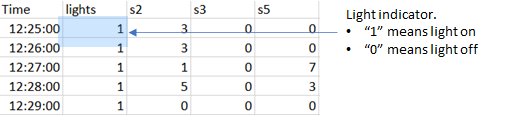

Let's plot the activity spider over the 24 hours together with the light indicator. The goal of this visualization is to help the viewer to understand if spider activity depends on light.

###  Experiment with moving average

Try different moving average to better  visualize effect of light on spider activiyty.  Experiment with averaging over different times. Plot the resulting moving averages for each spider

### Conclusion 3:

Do you think the light in the spider affect spider activity? If yes, do you thinig spiders are nocturnal animal(active during dark phase) or diurnal (active during th light phase)? or